In [1]:
!pip install mahotas
!pip install pingouin
!pip install openpyxl

  Using cached mahotas-1.4.18-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached mahotas-1.4.18-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.8 MB)
  Using cached pingouin-0.5.4-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached xarray-2024.6.0-py3-none-any.whl.metadata (11 kB)
Using cached pingouin-0.5.4-py2.py3-none-any.whl (198 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
Using cached xarray-2024.6.0-py3-none-any.whl (1.2 MB)


In [2]:
import pandas as pd
import mahotas as mt
import glob
import os
import PIL
from PIL import ImageOps
import numpy as np
import pingouin as pg
from IPython.display import Image, display
import seaborn as sns
sns.set()
import pingouin as pg
import plotly.express as px

In [3]:
from PIL import Image 

In [4]:
import matplotlib.pyplot as plt

In [5]:
artist_image_folder = 'artist-images'  # Replace with your subfolder name

filenames = glob.glob(os.path.join(artist_image_folder, "*.jpg"))

names = []
images = []

for i in filenames:
    names.append(os.path.basename(i)[:-4])
    img = Image.open(i)
    img = img.convert("RGBA")
    img = ImageOps.grayscale(img)
    img = np.asanyarray(img)
    images.append(img)

In [6]:
haralick = [mt.features.haralick(i, return_mean = True, compute_14th_feature=True) for i in images]


features = ['angular_2nd_momentum', 'contrast', 'correlation', 'SS_variance', \
            'Inverse_diff_moment', 'sum_average', 'sum_variance', 'sum_entropy', \
            'entropy','difference_variation', 'difference_entropy', 'info_corr_1', \
            'info_corr_2', 'max_corr_coeff']

h_df = pd.DataFrame(haralick, columns = features)
h_df['short_names'] = names

In [7]:
filenames = glob.glob(os.path.join(artist_image_folder, "*.png"))

names = []
images = []

for i in filenames:
    names.append(os.path.basename(i)[:-4])
    img = Image.open(i)
    img = img.convert("RGBA")
    img = ImageOps.grayscale(img)
    img = np.asanyarray(img)
    images.append(img)

In [8]:
haralick = [mt.features.haralick(i, return_mean = True, compute_14th_feature=True) for i in images]


features = ['angular_2nd_momentum', 'contrast', 'correlation', 'SS_variance', \
            'Inverse_diff_moment', 'sum_average', 'sum_variance', 'sum_entropy', \
            'entropy','difference_variation', 'difference_entropy', 'info_corr_1', \
            'info_corr_2', 'max_corr_coeff']

h_df_1 = pd.DataFrame(haralick, columns = features)
h_df_1['short_names'] = names

In [9]:
new_df = pd.concat([h_df, h_df_1]).reset_index(drop=True)

In [10]:
sorted_df = new_df.sort_values(by='entropy', ascending=False)
sorted_df

,angular_2nd_momentum,contrast,correlation,SS_variance,Inverse_diff_moment,sum_average,sum_variance,sum_entropy,entropy,difference_variation,difference_entropy,info_corr_1,info_corr_2,max_corr_coeff,short_names
53,0.000092,1879.996507,0.694659,3078.488170,0.082183,180.522955,10433.956173,8.525983,14.536900,0.000061,6.282405,-0.088182,0.855152,7.684124,BED 02
2,0.000109,1490.220211,0.763711,3154.261426,0.109399,272.487762,11126.825495,8.693887,14.374556,0.000085,6.026882,-0.149553,0.947187,6.304737,JSP 04
162,0.000066,966.189430,0.770399,2103.919874,0.051644,255.286780,7449.490066,8.415439,14.172290,0.000064,5.961679,-0.107039,0.884141,7.835424,RD 03
72,0.000201,950.382058,0.897966,4657.257013,0.143890,208.532677,17678.645995,8.828129,14.106722,0.000118,5.626369,-0.202479,0.977517,6.808222,JSP 16
97,0.000140,810.068219,0.868645,3083.443734,0.097432,311.094948,11523.706718,8.525645,13.896345,0.000114,5.520318,-0.170838,0.961205,7.425508,NM 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.724587,383.358448,0.936765,3033.826498,0.953536,468.096613,11751.947544,1.201631,1.332759,0.003533,0.596872,-0.710496,0.876757,3.503971,RD 32
167,0.815408,236.851606,0.685330,376.081980,0.924283,503.136867,1267.476313,0.963960,1.071731,0.003277,0.809683,-0.412833,0.645395,4.235747,RD 41
174,0.821941,957.760146,0.842650,3041.543993,0.943768,68.122034,11208.415827,0.990918,1.071701,0.003459,0.708123,-0.501358,0.712268,4.793201,RD 12
61,0.887761,484.642300,0.747916,960.942763,0.950850,9.361267,3359.128750,0.722899,0.862881,0.003473,0.640143,-0.404955,0.595437,5.288909,JSP 17


In [11]:
len(new_df)

221

In [12]:
# Get the top 10 rows with the highest 'entropy' values and sort by 'short_names'
top_10_entropy = new_df.nlargest(10, 'entropy')[['short_names', 'entropy']].sort_values(by='entropy', ascending=False)

print("Top 10 highest entropy values in artists' archives:")
print(top_10_entropy)

Top 10 highest entropy values in artists' archives:
    short_names    entropy
53       BED 02  14.536900
2        JSP 04  14.374556
162       RD 03  14.172290
72       JSP 16  14.106722
97        NM 25  13.896345
204       RD 04  13.850635
112       JB 37  13.803990
202       TP 11  13.796783
104       NM 05  13.783426
103       IG 59  13.730984


In [13]:
# Get the bottom 10 rows with the lowest 'entropy' values and sort by 'short_names'
bottom_10_entropy = new_df.nsmallest(10, 'entropy')[['short_names', 'entropy']].sort_values(by='entropy', ascending=True)
print("Lowest 10 entropy values in artists' archives:")
print(bottom_10_entropy)

Lowest 10 entropy values in artists' archives:
    short_names   entropy
157       RD 38  0.220961
61       JSP 17  0.862881
174       RD 12  1.071701
167       RD 41  1.071731
158       RD 32  1.332759
161       RD 18  1.404552
139       TP 18  1.429982
210       TP 16  1.600363
172       RD 07  1.629249
219       RD 35  1.642706


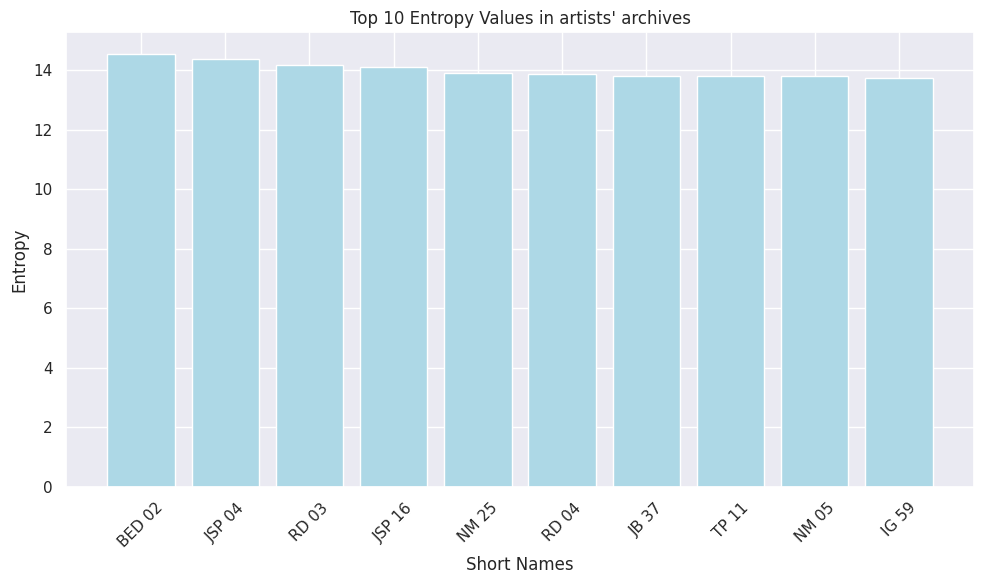

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_entropy['short_names'], top_10_entropy['entropy'], color='lightblue')
plt.title("Top 10 Entropy Values in artists' archives")
plt.xlabel('Short Names')
plt.ylabel('Entropy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

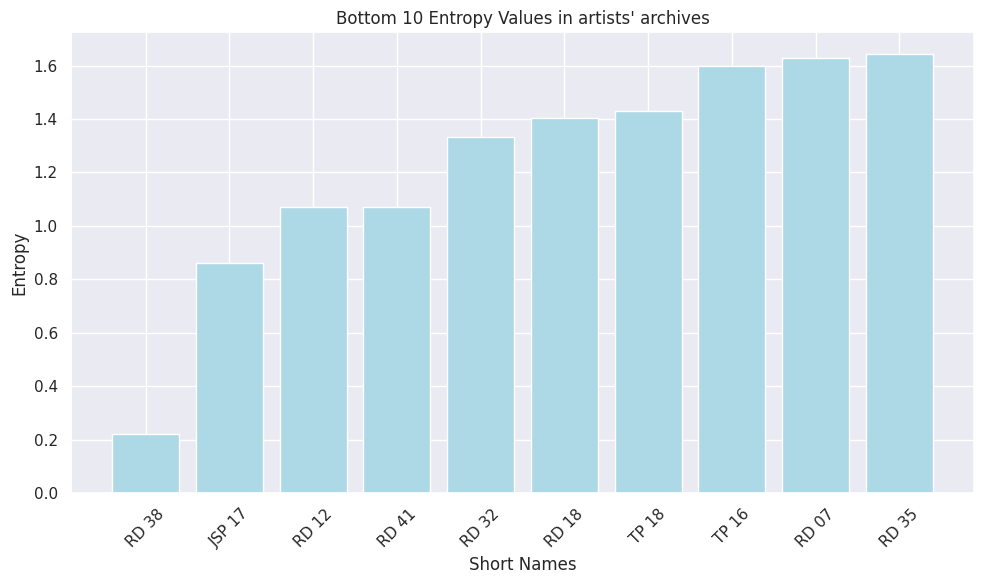

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_entropy['short_names'], bottom_10_entropy['entropy'], color='lightblue')
plt.title("Bottom 10 Entropy Values in artists' archives")
plt.xlabel('Short Names')
plt.ylabel('Entropy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# mean and standard deviation
mean_entropy = new_df['entropy'].mean()
std_entropy = new_df['entropy'].std()
print("the entropy mean for the artists' archives is:")
mean_entropy

the entropy mean for the artists' archives is:


9.130377082122463

In [17]:
std_entropy = new_df['entropy'].std()
print("the standard deviation for entropy in the artists' archives is:")
std_entropy

the standard deviation for entropy in the artists' archives is:


3.795061492451421

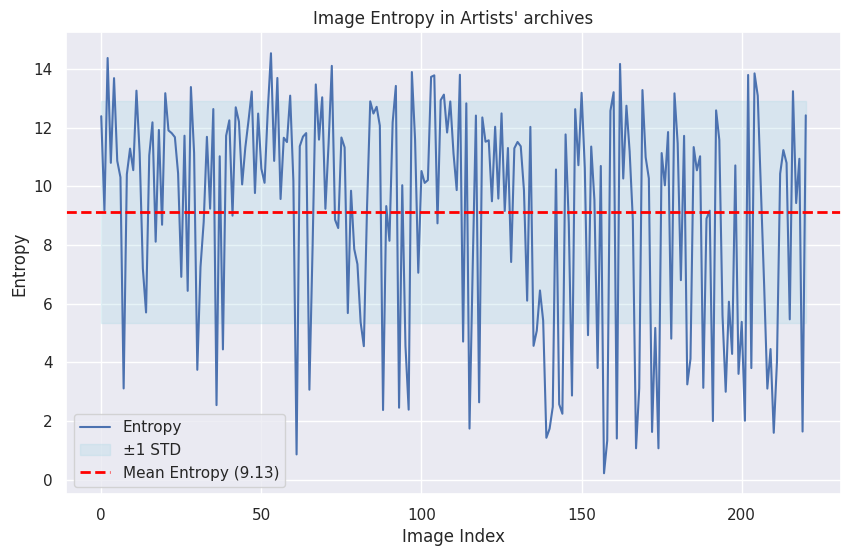

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['entropy'], linestyle='-', color='b', label='Entropy')

# Shade region for standard deviation
plt.fill_between(new_df.index, mean_entropy - std_entropy, mean_entropy + std_entropy, color='lightblue', alpha=0.3, label='±1 STD')

# Title and labels
plt.title("Image Entropy in Artists' archives")
plt.xlabel('Image Index')
plt.ylabel('Entropy')

# Mark mean line
plt.axhline(mean_entropy, color='red', linestyle='--', linewidth=2, label=f'Mean Entropy ({mean_entropy:.2f})')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

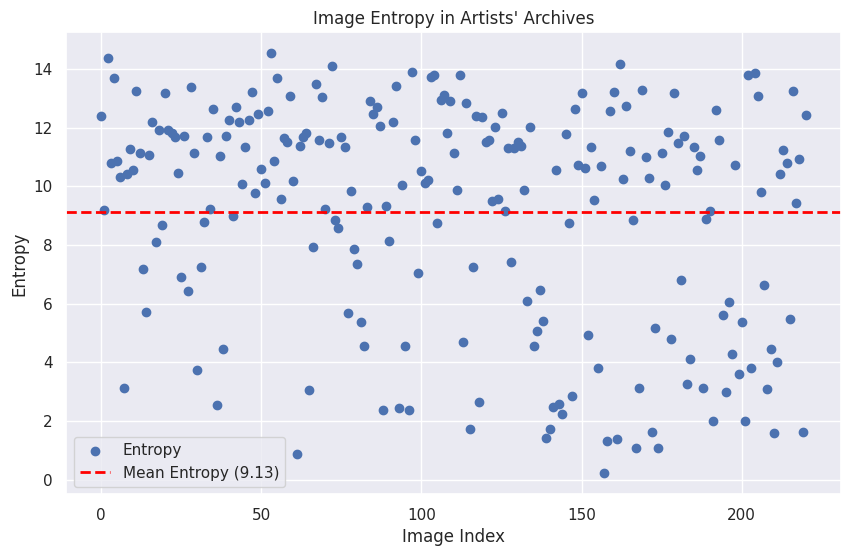

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df.index, new_df['entropy'], color='b', label='Entropy')

# Title and labels
plt.title("Image Entropy in Artists' Archives")
plt.xlabel('Image Index')
plt.ylabel('Entropy')

# Mark mean line
plt.axhline(mean_entropy, color='red', linestyle='--', linewidth=2, label=f'Mean Entropy ({mean_entropy:.2f})')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [22]:
#open and read dataframe to compare 
random_images = "flickr-images"  # Replace with your subfolder name

# List of all .jpg files in the subfolder
filenames = glob.glob(os.path.join(random_images, "*.jpg"))

names_r = []
images_r = []

for i in filenames:
    # Get the base name without extension
    names_r.append(os.path.basename(i)[:-4])
    
    # Open, convert, and process the image
    img = Image.open(i)
    img = img.convert("RGBA")
    img = ImageOps.grayscale(img)
    img = np.asarray(img)
    
    images_r.append(img)

In [23]:
haralick = [mt.features.haralick(i, return_mean = True, compute_14th_feature=True) for i in images_r]


features = ['angular_2nd_momentum', 'contrast', 'correlation', 'SS_variance', \
            'Inverse_diff_moment', 'sum_average', 'sum_variance', 'sum_entropy', \
            'entropy','difference_variation', 'difference_entropy', 'info_corr_1', \
            'info_corr_2', 'max_corr_coeff']

random_image_df = pd.DataFrame(haralick, columns = features)
random_image_df['short_names'] = names_r

In [24]:
random_df_sample = random_image_df.sample(n=221, random_state=1)
print(random_df_sample.head(5))

      angular_2nd_momentum     contrast  correlation  SS_variance  \
1482              0.000268   843.945913     0.854754  2905.041182   
1145              0.000441   632.086693     0.883455  2711.855600   
2580              0.003423   107.512815     0.980890  2813.067654   
432               0.000410   224.592638     0.972101  4025.580772   
2263              0.000072  1278.553215     0.806807  3308.911566   

      Inverse_diff_moment  sum_average  sum_variance  sum_entropy    entropy  \
1482             0.169867   152.861469  10776.218815     8.441566  13.340576   
1145             0.235351   227.061593  10215.335707     8.415076  12.889902   
2580             0.359916   117.553796  11144.757801     7.457477  10.500350   
432              0.264723   204.262270  15877.730452     8.605924  12.447837   
2263             0.068044   231.279036  11957.093048     8.673548  14.398765   

      difference_variation  difference_entropy  info_corr_1  info_corr_2  \
1482              0.000164  

In [25]:
sorted_random_df = random_df_sample.sort_values(by='entropy', ascending=False)
sorted_random_df

,angular_2nd_momentum,contrast,correlation,SS_variance,Inverse_diff_moment,sum_average,sum_variance,sum_entropy,entropy,difference_variation,difference_entropy,info_corr_1,info_corr_2,max_corr_coeff,short_names
192,0.000084,2350.858795,0.761582,4930.022319,0.062831,185.284670,17369.230480,8.765954,14.710424,0.000053,6.447508,-0.114515,0.910670,7.426056,211277478
157,0.000068,1601.757375,0.797464,3954.234105,0.075357,260.960807,14215.179043,8.816566,14.624469,0.000060,6.229117,-0.139508,0.941946,7.589525,26172759
1814,0.000245,2880.496821,0.727520,5285.422008,0.077079,340.787914,18261.191211,8.692744,14.519825,0.000049,6.593756,-0.101570,0.881344,6.560435,121178216
2703,0.000090,2042.360590,0.747755,4048.339473,0.101503,215.280690,14150.997304,8.764312,14.506940,0.000091,6.083295,-0.147767,0.945036,6.198874,170100272
1681,0.000070,1394.284597,0.731765,2598.960415,0.060639,239.071897,9001.557061,8.585969,14.490350,0.000067,6.096918,-0.113485,0.905525,7.201542,114164952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.006805,153.093741,0.988460,6634.796631,0.486971,126.991891,26386.092781,7.505248,9.945695,0.000784,3.127309,-0.482508,0.998810,4.255721,198456565
17,0.003027,183.176483,0.906010,975.069067,0.365905,241.905743,3717.099785,6.828969,9.769244,0.000600,3.405712,-0.336396,0.989346,4.698475,122958692
2543,0.022268,189.579674,0.956009,2154.815965,0.518368,61.621208,8429.684188,6.765928,9.120004,0.000798,3.323901,-0.450149,0.997417,4.963293,127257426
1661,0.078902,348.149279,0.981107,9213.464585,0.565630,345.503590,36505.709060,6.086636,8.278534,0.000951,3.287222,-0.436491,0.994953,4.908097,170525554


In [26]:
# Get the top 10 rows with the highest 'entropy' values and sort by 'short_names'
top_10_entropy_sample_images = sorted_random_df.nlargest(10, 'entropy')[['short_names', 'entropy']].sort_values(by='entropy', ascending=False)

print("Top 10 highest entropy values sample images")
print(top_10_entropy_sample_images)

Top 10 highest entropy values sample images
     short_names    entropy
192    211277478  14.710424
157     26172759  14.624469
1814   121178216  14.519825
2703   170100272  14.506940
1681   114164952  14.490350
2870    96828131  14.434934
2263   191592626  14.398765
1509   115275691  14.386320
330    184037893  14.356511
1217   113637264  14.353294


In [27]:
# Get the bottom 10 rows with the lowest 'entropy' values and sort by 'short_names'
bottom_10_entropy_sample_images = sorted_random_df.nsmallest(10, 'entropy')[['short_names', 'entropy']].sort_values(by='entropy', ascending=True)
print("Lowest 10 entropy values sample images:")
print(bottom_10_entropy_sample_images)

Lowest 10 entropy values sample images:
     short_names    entropy
107     15308698   8.099082
1661   170525554   8.278534
2543   127257426   9.120004
17     122958692   9.769244
1477   198456565   9.945695
1784   112178718  10.164858
1432    12118309  10.423747
2580    36995794  10.500350
1592   231178641  10.727110
1459    54185885  10.774072


In [28]:
# mean and standard deviation
mean_entropy_f = sorted_random_df['entropy'].mean()
std_entropy_f = sorted_random_df['entropy'].std()
print("the entropy mean of the sample images is:")
mean_entropy_f

the entropy mean of the sample images is:


12.733578071432659

In [29]:
std_entropy_f = sorted_random_df['entropy'].std()
print("the entropy standard deviation of the sample images is:")
std_entropy_f

the entropy standard deviation of the sample images is:


1.1155499535823505

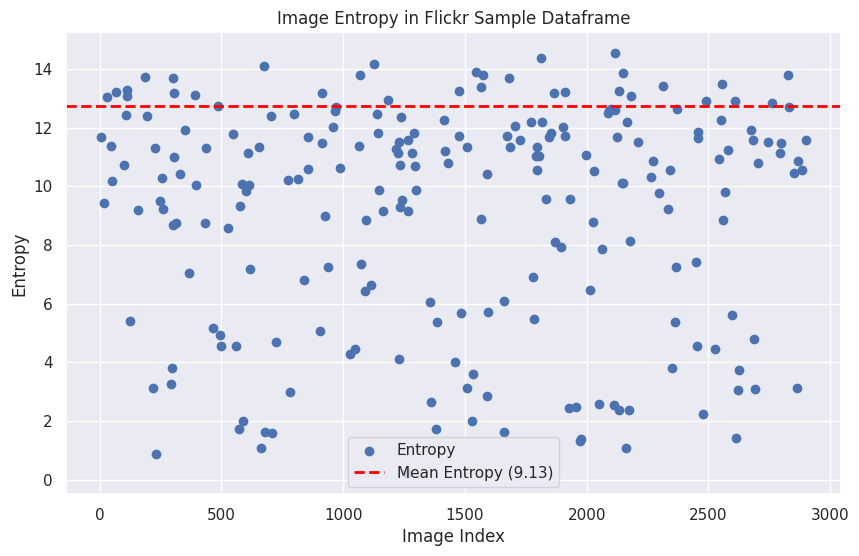

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(sorted_random_df.index, new_df['entropy'], color='b', label='Entropy')

# Title and labels
plt.title("Image Entropy in Flickr Sample Dataframe")
plt.xlabel('Image Index')
plt.ylabel('Entropy')

# Mark mean line
plt.axhline(mean_entropy_f, color='red', linestyle='--', linewidth=2, label=f'Mean Entropy ({mean_entropy:.2f})')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [31]:
new_df["source"]="Artist Archive"
sorted_random_df["source"]="Flickr Sample Dataset"

In [32]:
all_images_df = pd.concat([new_df, sorted_random_df]).reset_index(drop=True)

In [33]:
all_images_df

,angular_2nd_momentum,contrast,correlation,SS_variance,Inverse_diff_moment,sum_average,sum_variance,sum_entropy,entropy,difference_variation,difference_entropy,info_corr_1,info_corr_2,max_corr_coeff,short_names,source
0,0.000289,63.218730,0.990235,3237.109859,0.208722,255.767376,12885.220707,8.669395,12.390997,0.000350,3.857108,-0.387599,0.998639,4.618064,JB 46,Artist Archive
1,0.009718,191.145287,0.965568,2775.502369,0.555709,388.217442,10910.864190,7.035257,9.183209,0.000957,2.753673,-0.496342,0.998750,4.269303,JB 45,Artist Archive
2,0.000109,1490.220211,0.763711,3154.261426,0.109399,272.487762,11126.825495,8.693887,14.374556,0.000085,6.026882,-0.149553,0.947187,6.304737,JSP 04,Artist Archive
3,0.001505,108.413695,0.943187,954.185592,0.310311,292.904451,3708.328673,7.424717,10.801684,0.000504,3.663308,-0.323787,0.991200,4.088740,JB 23,Artist Archive
4,0.000186,599.014954,0.929595,4254.148754,0.107765,299.414385,16417.580062,8.547664,13.688544,0.000131,5.360285,-0.199764,0.974326,6.966413,JB 47,Artist Archive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.006805,153.093741,0.988460,6634.796631,0.486971,126.991891,26386.092781,7.505248,9.945695,0.000784,3.127309,-0.482508,0.998810,4.255721,198456565,Flickr Sample Dataset
438,0.003027,183.176483,0.906010,975.069067,0.365905,241.905743,3717.099785,6.828969,9.769244,0.000600,3.405712,-0.336396,0.989346,4.698475,122958692,Flickr Sample Dataset
439,0.022268,189.579674,0.956009,2154.815965,0.518368,61.621208,8429.684188,6.765928,9.120004,0.000798,3.323901,-0.450149,0.997417,4.963293,127257426,Flickr Sample Dataset
440,0.078902,348.149279,0.981107,9213.464585,0.565630,345.503590,36505.709060,6.086636,8.278534,0.000951,3.287222,-0.436491,0.994953,4.908097,170525554,Flickr Sample Dataset


<Axes: xlabel='source', ylabel='entropy'>

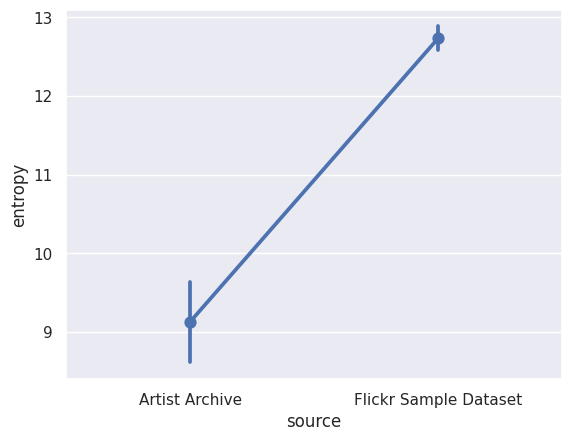

In [34]:
sns.pointplot(x="source", y="entropy", data=all_images_df)

<Axes: xlabel='source', ylabel='contrast'>

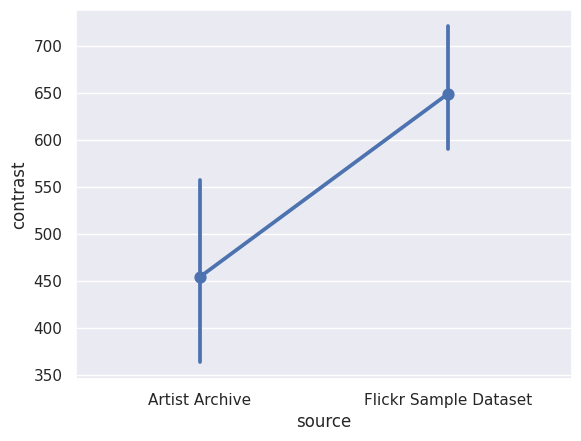

In [35]:
sns.pointplot(x="source", y="contrast", data=all_images_df)

In [36]:
!pip install pingouin

In [37]:
import pingouin as pg

In [38]:
t_test_entropy=pg.pairwise_tests(dv='entropy', between='source', data=all_images_df)
t_test_entropy

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,source,Artist Archive,Flickr Sample Dataset,False,True,-13.541596,440.0,two-sided,3.614892e-35,5.76e+31,-1.286019


In [39]:
entropy_stats = all_images_df.groupby('source')['entropy'].agg(['mean', 'std']).reset_index()
print(entropy_stats)

                  source       mean       std
0         Artist Archive   9.130377  3.795061
1  Flickr Sample Dataset  12.733578  1.115550
